<a href="https://colab.research.google.com/github/sefahw/paper-folding-assignment/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [23]:

class ScratchDecesionTreeClassifierDepth1():
  def __init__(self, verbose=False):
     self.verbose = verbose

  def _gini(self, X):
    unique,count= np.unique(X, return_counts=True)
    tmp=0
    for i in unique:
        tmp+=(count[unique==i]/np.sum(count))**2
    return 1-tmp
  def fit(self,X, y):
      feature_num=X.shape[1]
      self.gain= 0
      for i in range(feature_num):
           self.threshold=np.unique(X[:,i])
           for j in self.threshold[1,:]:
               l=y[X[:,i]<j]
               r=y[X[:,i]>=j]
               gini_l=len(l)/len(l)+len(r)*self._gini(l)
               gini_r=len(r)/len(l)+len(r)*self._gini(r)
               tmp=self._gini(y)-gini_l-gini_r
               if tmp> self.gain:
                  self.l_label=statistics.mode(l)
                  self.r_label=statistics.mode(r)
                  self.feature=l
                  self.threshold=j
                  self.gain=tmp
                  if self.verbose:
                     print('feature',self.feature,
                           'treshold',self.threshold,
                           'gain',self.gain)
  def predict(self, X): 
      return np.where(X[:,self.feature]<self.threshold,self.l_label,self.r_label) 


In [24]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [25]:
X=np.array([0,2,1,-1,4])
y=np.array([0,0,0,1,1])

threshold_value=np.unique(X)
print('threshold_value',threshold_value)

threshold_value [-1  0  1  2  4]


In [26]:
u,counts=np.unique(y,return_counts=True)
print('unique',u,'unique_counts',counts)


unique [0 1] unique_counts [3 2]


In [27]:
def _gini(X):
    unique,count= np.unique(X, return_counts=True)
    tmp=0
    for i in unique:
        tmp+=(count[unique==i]/np.sum(count))**2
    return 1-tmp

In [28]:
for i in threshold_value[1:]:
               c1=y[X <i]
               c2=y[X >=i]


               print(i,'c1',c1,'c2',c2)
               print(i,'gini_left:',_gini(c1),'gini_right:',_gini(c2))

0 c1 [1] c2 [0 0 0 1]
0 gini_left: [0.] gini_right: [0.375]
1 c1 [0 1] c2 [0 0 1]
1 gini_left: [0.5] gini_right: [0.44444444]
2 c1 [0 0 1] c2 [0 1]
2 gini_left: [0.44444444] gini_right: [0.5]
4 c1 [0 0 0 1] c2 [1]
4 gini_left: [0.375] gini_right: [0.]


In [29]:
for i in threshold_value[1:]:
               c1=y[X <i]
               c2=y[X >=i]
               left=len(c1)/(len(c1)+len(c2))*_gini(c1)
               right=len(c2)/(len(c1)+len(c2))*_gini(c2)
               gain=_gini(X)-left-right
               print(i,gain)


0 [0.5]
1 [0.33333333]
2 [0.33333333]
4 [0.5]


In [30]:
X=np.array([[-0.44699,-2.807],[-1.4621,-2.4586],
            [0.10645,1.9242],[-3.5944,-4.0112],
            [0.9888,4.5718],[-3.1625,-3.9606],
            [0.56421,0.72888],[-0.60216,8.4636],
            [-0.61251,-0.75345],[-0.73535,-2.2718],
            [-0.80647,-2.2135],[0.86291,2.5946],
            [-3.11108,0.15394],[-2.9362,2.5462],
            [-0.57242,-2.9915],[1.4771,3.4896],
            [-0.58619,0.37158],[0.6017,4.3439],
            [-2.1086,8.3428],[-410113,-4.353],
            [-1.9948,-1.3927],[0.35084,-0.031994],
            [0.96765,7.8929],[-1.281,15.6824],
            [0.96765,10.083],[1.3763,1.3347],
            [-2.3234,-2.5323],[-2.9452,-1.8219],
            [0.14654,-0.28733],[0.5461,5.8245],
            [-0.65259,9.3444],[0.59912,5.3524],
            [0.50214,-0.31818],[-3.0603,-3.6461],
            [-6.6797,0.67661],[-2.353,-0.72261],
            [1.1319,2.4023],[-0.12243,9.0162],
            [-2.5677,13.1779],[0.057313,5.4681]
            ])
y=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

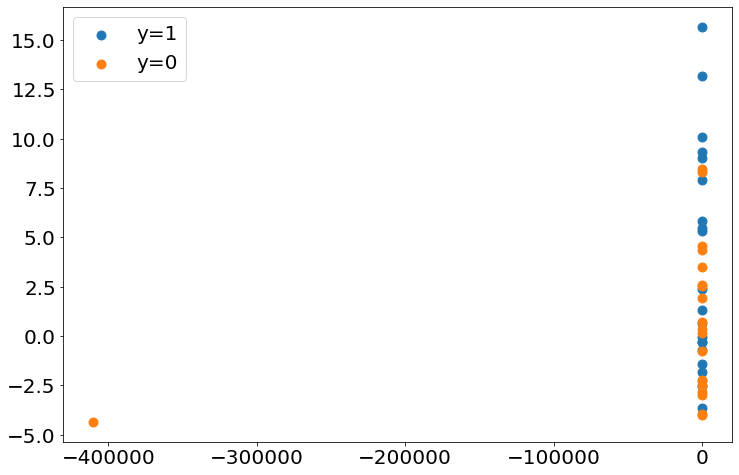

In [31]:
fig=plt.subplots(figsize=(12,8))
plt.rcParams["font.size"]=20
plt.scatter(X[y==1,0] ,X[y==1,1],s=80,label='y=1')
plt.scatter(X[y==0,0] ,X[y==0,1],s=80,label='y=0')
plt.legend();

In [32]:
from sklearn.model_selection  import train_test_split
X_train,X_valid,y_train,y_valid=\
train_test_split(X,y,train_size=0.8,random_state=None)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(32, 2)
(32,)
(8, 2)
(8,)


In [33]:
clf1 = ScratchDecesionTreeClassifierDepth1(verbose=True)

clf1.fit(X_train,y_train)
  

IndexError: ignored

In [ ]:
y_pred=clf1.predict(X_valid)

In [ ]:
print(y_pred)
print(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score
accuracy=accuracy_score(y_valid,y_pred)
precision=precision_score(y_valid,y_pred)
recall=recall_score(y_valid,y_pred)
f1=f1_score(y_valid,y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

In [ ]:
fit,ax=plt.subplots(figsize=(12,12))
plt.rcParams["font.size"]=20
decision_region(X_train,y_train,clf1,target_names=['0'   '1'],title='TRAIN')